# Návod použití
## Google Colab
Pokud se nacházíte v rozhraní Google Colab, složka "DMP_Neuronove_site", ve které se nachází tento notebook a program "custom_ann.py", by se měla na Vašem Google Disku nacházet ve výchozí složce "Můj Disk". 

všechny buňky lze naráz spustit pomocí "Běh -> Spustit vše" v horní liště. Samostatné buňky lze spustit pomocí kliknutím na danou buňku a klávesami "Ctrl+Enter". 

Chvilku možná bude trvat, než se notebook připojí k běhovému prostředí, které doporučuji nastavit na vzdálenou GPU pomocí "Běh -> Zvolit běhové prostředí -> GPU".

Program v určité části požádá o přístup k Vašemu Google Disku, aby mohl naimportovat neuronovou síť ze souboru "custom_cnn.py". Pokud povolíte, zbytek programu by měl proběhnout bez problému. Pokud se po udělení přístupu notebook zasekne, odpojte a smažte běh pomocí "Běh -> Odpojit a smazat běh" a spusťte manuálně buňku po buňce.

## Jiné rozhraní
Pokud se nacházíte v jiném rozhraní, pak zakomentujte nebo smažte všechny řádky kódu okomentované "# Pro Colab" a ujistěte se, že všechny použité knihovny máte nainstalované na počítači nebo ve Vašem virtuálním prostředí.

Pro správnou funkci musíte být připojeni k internetu, protože datový soubor GTSRB je nahráván z cloudové databáze knihovny Deeplake.

# Instalace modulu Deeplake do běhového prostředí

In [ ]:
!pip install deeplake # Pro Colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 K

# Importování knihoven

In [ ]:
import deeplake
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Importování vlastní neuronové sítě z google drive do google colab

In [ ]:
from google.colab import drive # Pro Colab
drive.mount('/content/gdrive') # Pro Colab

Mounted at /content/gdrive


In [ ]:
import sys # Pro Colab
sys.path.append('/content/gdrive/My Drive/DMP_Neuronove_site') # Pro Colab

In [ ]:
from custom_ann import Artificial_Neural_Network

# Nahrání a zpracování dat

In [ ]:
test_data = deeplake.load("hub://activeloop/gtsrb-test")
training_data = deeplake.load("hub://activeloop/gtsrb-train")

hub://activeloop/gtsrb-test loaded successfully.

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-test

hub://activeloop/gtsrb-train loaded successfully.

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-train



In [ ]:
# Načtení trénovacích a testovacích vstupních dat
X_test = []
X_train = []
for image in test_data.images:
    image = image.numpy()
    image = cv2.resize(image, (30, 30))
    X_test.append(image)
for image in training_data.images:
    image = image.numpy()
    image = cv2.resize(image, (30, 30))
    X_train.append(image)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Načtení trénovacích a testovacích výstupních dat
y_test = np.array(test_data.labels.numpy().reshape(1,len(test_data.labels.numpy()))[0])
y_train = np.array(training_data.labels.numpy().reshape(1,len(training_data.labels.numpy()))[0])

# Získání validačních dat
X_valid, X_test = X_test[:3000], X_test[3000:]
y_valid, y_test = y_test[:3000], y_test[3000:]

# Normalizace vstupních dat do hodnot v rozmezí 0-1
X_train_norm, X_test_norm, X_valid_norm = X_train / 255, X_test / 255, X_valid / 255

# Manuální zploštění snímků pro mou vlastní neuronovou síť
X_train_flattened = [np.array([x.flatten()]).T for x in X_train_norm]
X_test_flattened = [np.array([x.flatten()]).T for x in X_test_norm]
X_valid_flattened = [np.array([x.flatten()]).T for x in X_valid_norm]

# Kódování výstupních dat do cílových vektorů
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)
y_valid_encoded = tf.keras.utils.to_categorical(y_valid)

# Ilustrační snímky datového souboru GTSRB

In [ ]:
class_names = training_data.labels.info.class_names

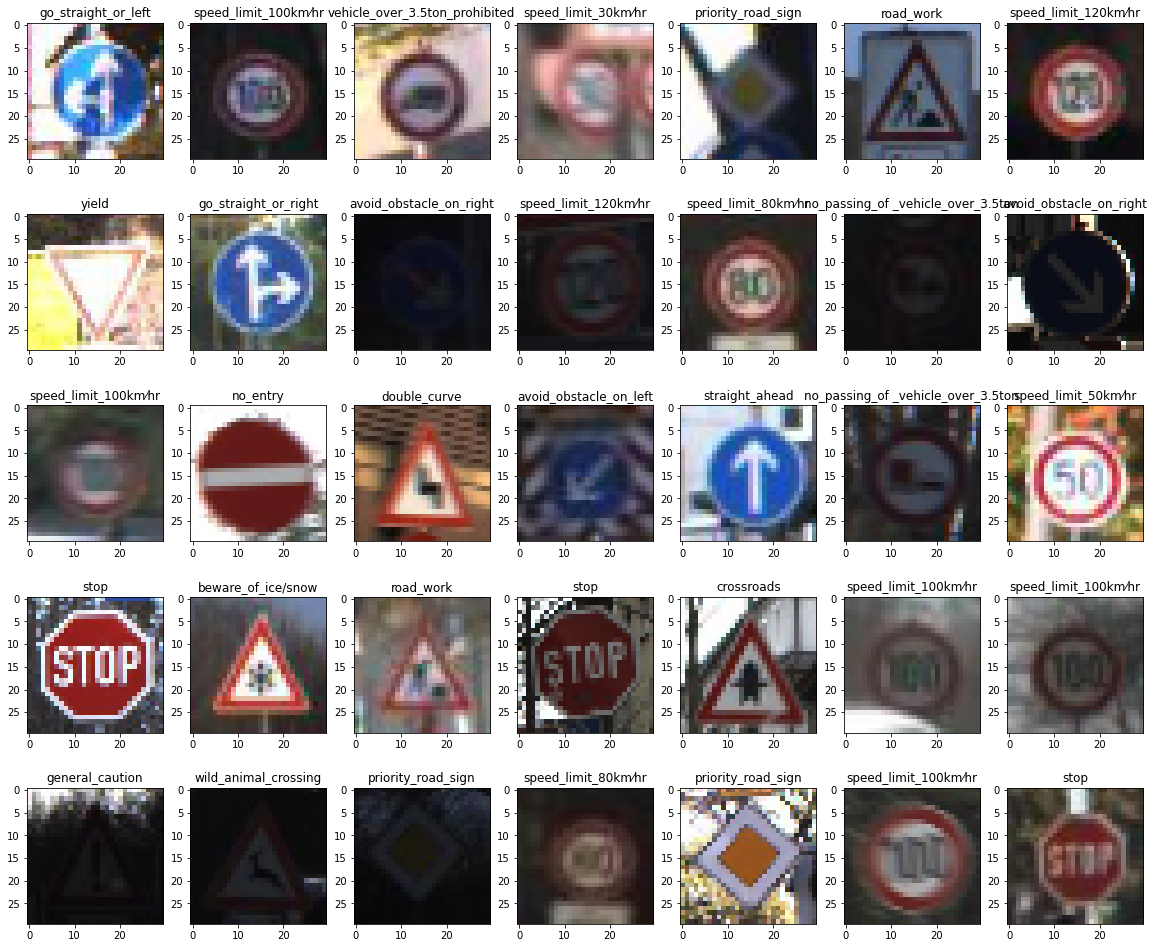

In [ ]:
fig, axes = plt.subplots(5, 7, figsize = (20, 17))
for row in axes:
  for axe in row:
    i = np.random.randint(len(X_train))
    axe.imshow(X_train[i])
    axe.set_title(class_names[y_train[i]])

# Učení mé vlastní neuronové sítě

In [ ]:
custom_model = Artificial_Neural_Network((2700, 128, 64, 43))
custom_model.stochastic_gradient_descent(X_train_flattened, y_train_encoded, 
                                         epochs=30, mini_batch_size=10, learning_rate=0.5, 
                                         validation_data=(X_valid_flattened, y_valid_encoded))

Epoch 1 -> Training loss: 2.7405106862758775, Training accuracy: 0.017444974368129765, Validation loss: 2.7441513346975164, Validation accuracy: 0.022333333333333334
Epoch 2 -> Training loss: 2.622351852174909, Training accuracy: 0.018873217883649162, Validation loss: 2.656647999355275, Validation accuracy: 0.02
Epoch 3 -> Training loss: 0.6866642416626021, Training accuracy: 0.4467851768726568, Validation loss: 0.7273554726852325, Validation accuracy: 0.4156666666666667
Epoch 4 -> Training loss: 0.6012312316647056, Training accuracy: 0.5221505266647963, Validation loss: 0.6600324791650656, Validation accuracy: 0.4633333333333333
Epoch 5 -> Training loss: 0.5809022219057733, Training accuracy: 0.5475528577622485, Validation loss: 0.6366886915224054, Validation accuracy: 0.494
Epoch 6 -> Training loss: 0.5057240281676789, Training accuracy: 0.6230202249483537, Validation loss: 0.5755552513410986, Validation accuracy: 0.5633333333333334
Epoch 7 -> Training loss: 0.4499861737773911, Train

# Vytvoření a učení neuronové sítě pomocí TensorFlow Keras

In [ ]:
keras_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", 
                        input_shape=(30, 30, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation="softmax")
])

In [ ]:
keras_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 128)         147584    
                                                      

In [ ]:
keras_model.compile(optimizer = "nadam",
                    loss = "categorical_crossentropy",
                    metrics=["accuracy"])

In [ ]:
keras_model_history = keras_model.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_valid_norm, y_valid_encoded))

Epoch 1/30
1226/1226 [==============================] - 16s 9ms/step - loss: 1.9537 - accuracy: 0.4344 - val_loss: 0.5461 - val_accuracy: 0.8593
Epoch 2/30
1226/1226 [==============================] - 11s 9ms/step - loss: 0.4961 - accuracy: 0.8449 - val_loss: 0.1900 - val_accuracy: 0.9480
Epoch 3/30
1226/1226 [==============================] - 11s 9ms/step - loss: 0.2975 - accuracy: 0.9104 - val_loss: 0.1794 - val_accuracy: 0.9540
Epoch 4/30
1226/1226 [==============================] - 11s 9ms/step - loss: 0.2163 - accuracy: 0.9353 - val_loss: 0.1384 - val_accuracy: 0.9633
Epoch 5/30
1226/1226 [==============================] - 11s 9ms/step - loss: 0.1976 - accuracy: 0.9416 - val_loss: 0.1291 - val_accuracy: 0.9680
Epoch 6/30
1226/1226 [==============================] - 11s 9ms/step - loss: 0.1657 - accuracy: 0.9529 - val_loss: 0.1217 - val_accuracy: 0.9653
Epoch 7/30
1226/1226 [==============================] - 11s 9ms/step - loss: 0.1665 - accuracy: 0.9529 - val_loss: 0.1204 - val_ac

# Testování a porovnání výsledných modelů

# Porovnání průběhu učení neuronových sítí

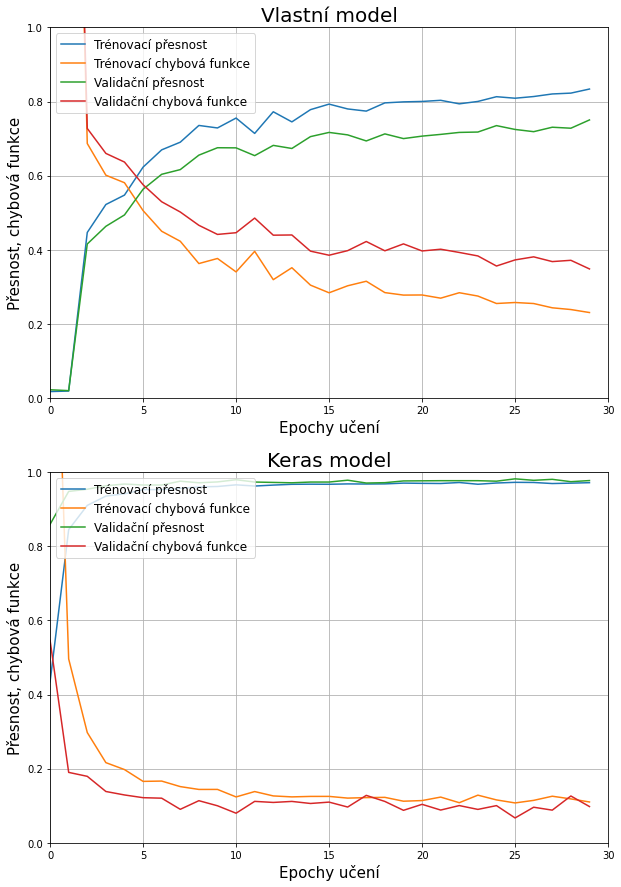

In [ ]:
histories = {"Vlastní model": custom_model.history, "Keras model": keras_model_history.history}
fig, axes = plt.subplots(len(histories), 1, figsize = (10, 15))
for index, (title, history) in enumerate(histories.items()):
  axes[index].set_title(title, fontsize=20)
  axes[index].set_xlabel('Epochy učení', fontsize=15)
  axes[index].set_ylabel('Přesnost, chybová funkce', fontsize=15)
  axes[index].plot(history["accuracy"])
  axes[index].plot(history["loss"])
  axes[index].plot(history["val_accuracy"])
  axes[index].plot(history["val_loss"])
  axes[index].grid(True)
  axes[index].set_xlim(0, len(history["accuracy"]))
  axes[index].set_ylim(0, 1)
  axes[index].legend(["Trénovací přesnost", "Trénovací chybová funkce", "Validační přesnost",  "Validační chybová funkce"], loc="upper left", fontsize=12)

# Testování modelů

In [ ]:
custom_model.evaluate(X_test_flattened, y_test_encoded)

Test loss: 0.33786788928962036, Test accuracy: 0.7583199449162268


In [ ]:
keras_model.evaluate(X_test_norm, y_test_encoded)

137/137 [==============================] - 1s 5ms/step - loss: 0.0767 - accuracy: 0.9819


[0.07674568891525269, 0.9818682670593262]

# Ilustrační predikce

## Ilustrační predikce mé vlastní neuronové sítě

In [ ]:
predictions = custom_model.predict(X_test_flattened).argmax(axis=1)
predictions

array([13,  5, 30, ..., 11,  2,  2])

### Správné predikce

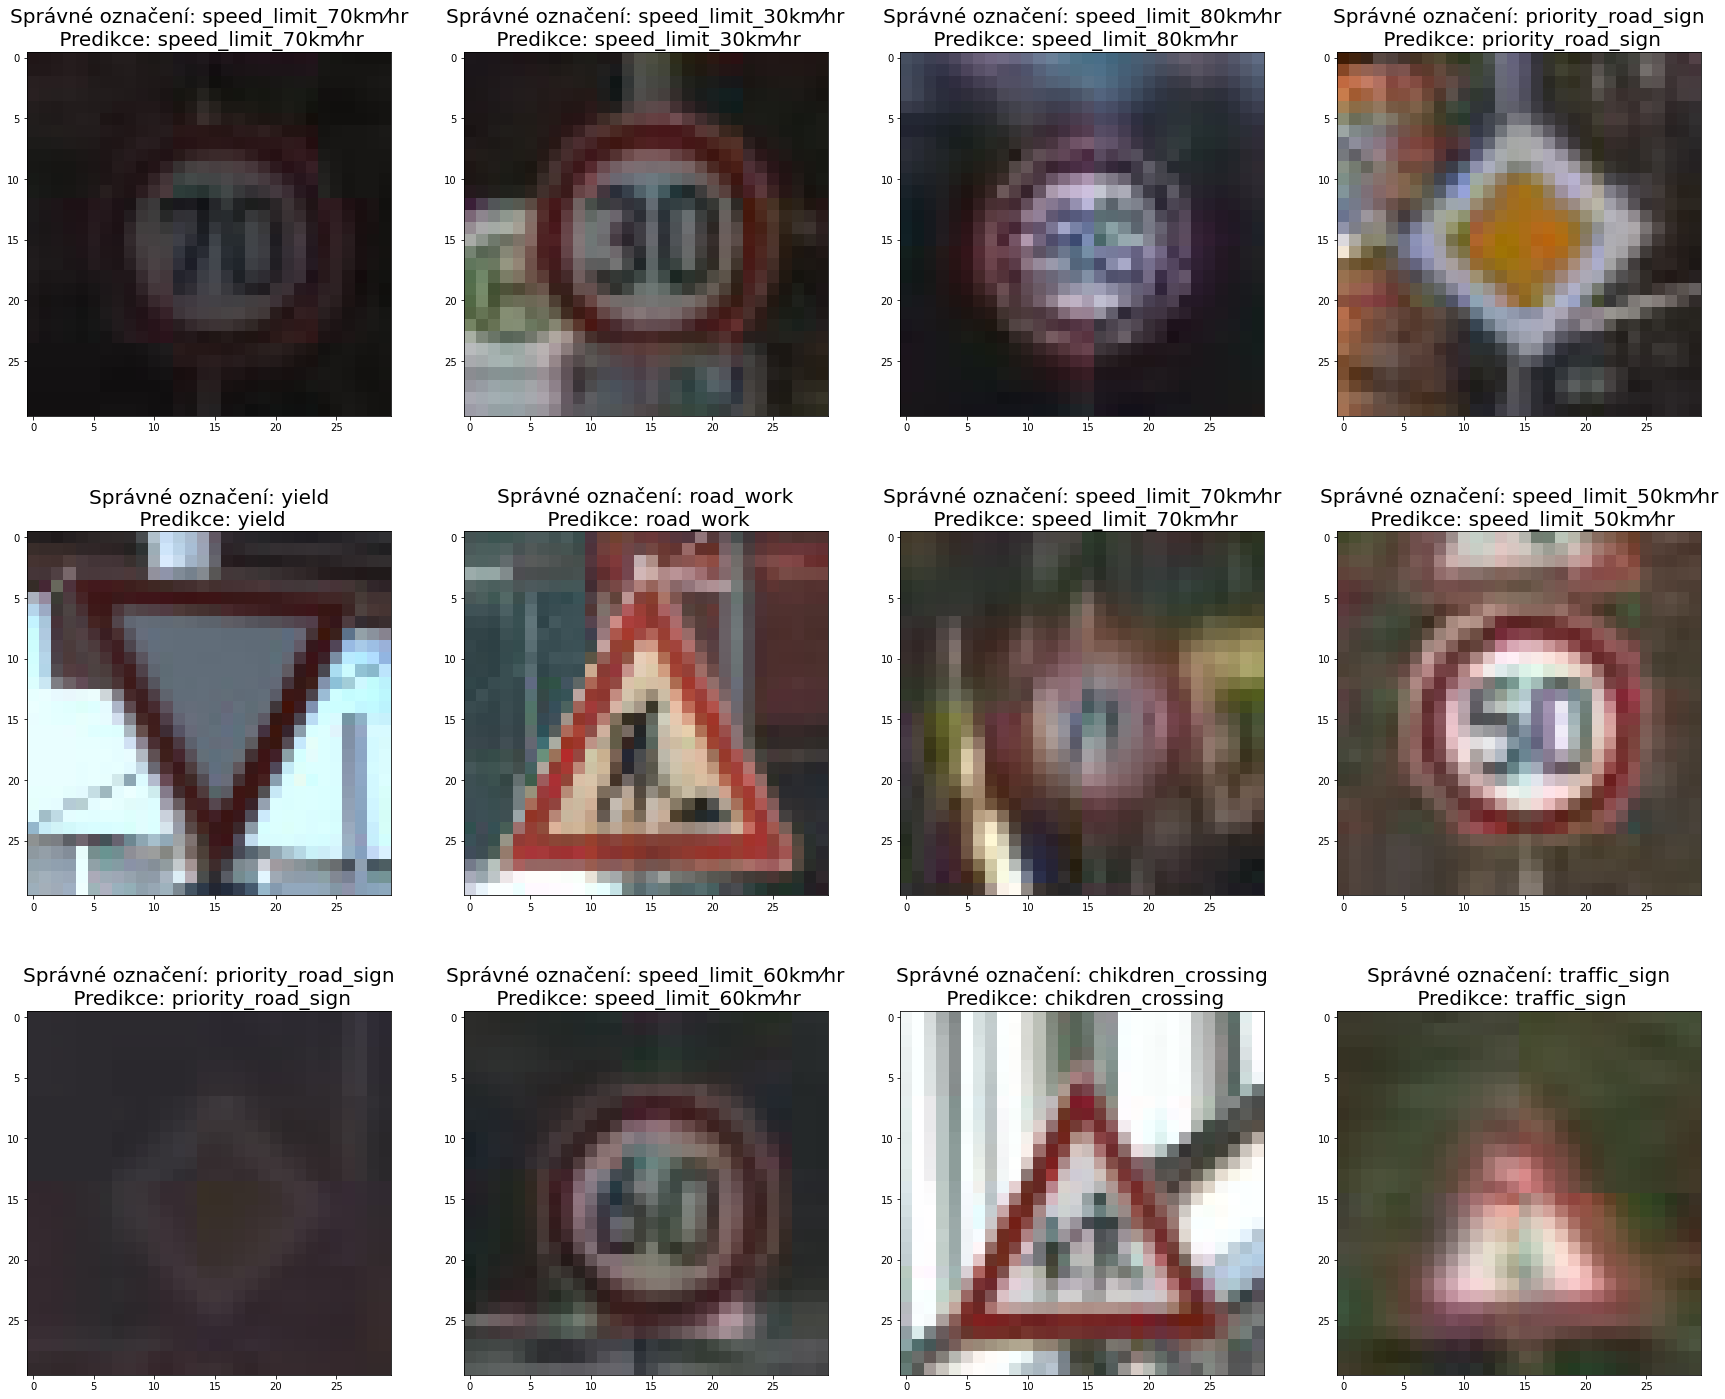

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] != predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i])
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)

### Špatné predikce

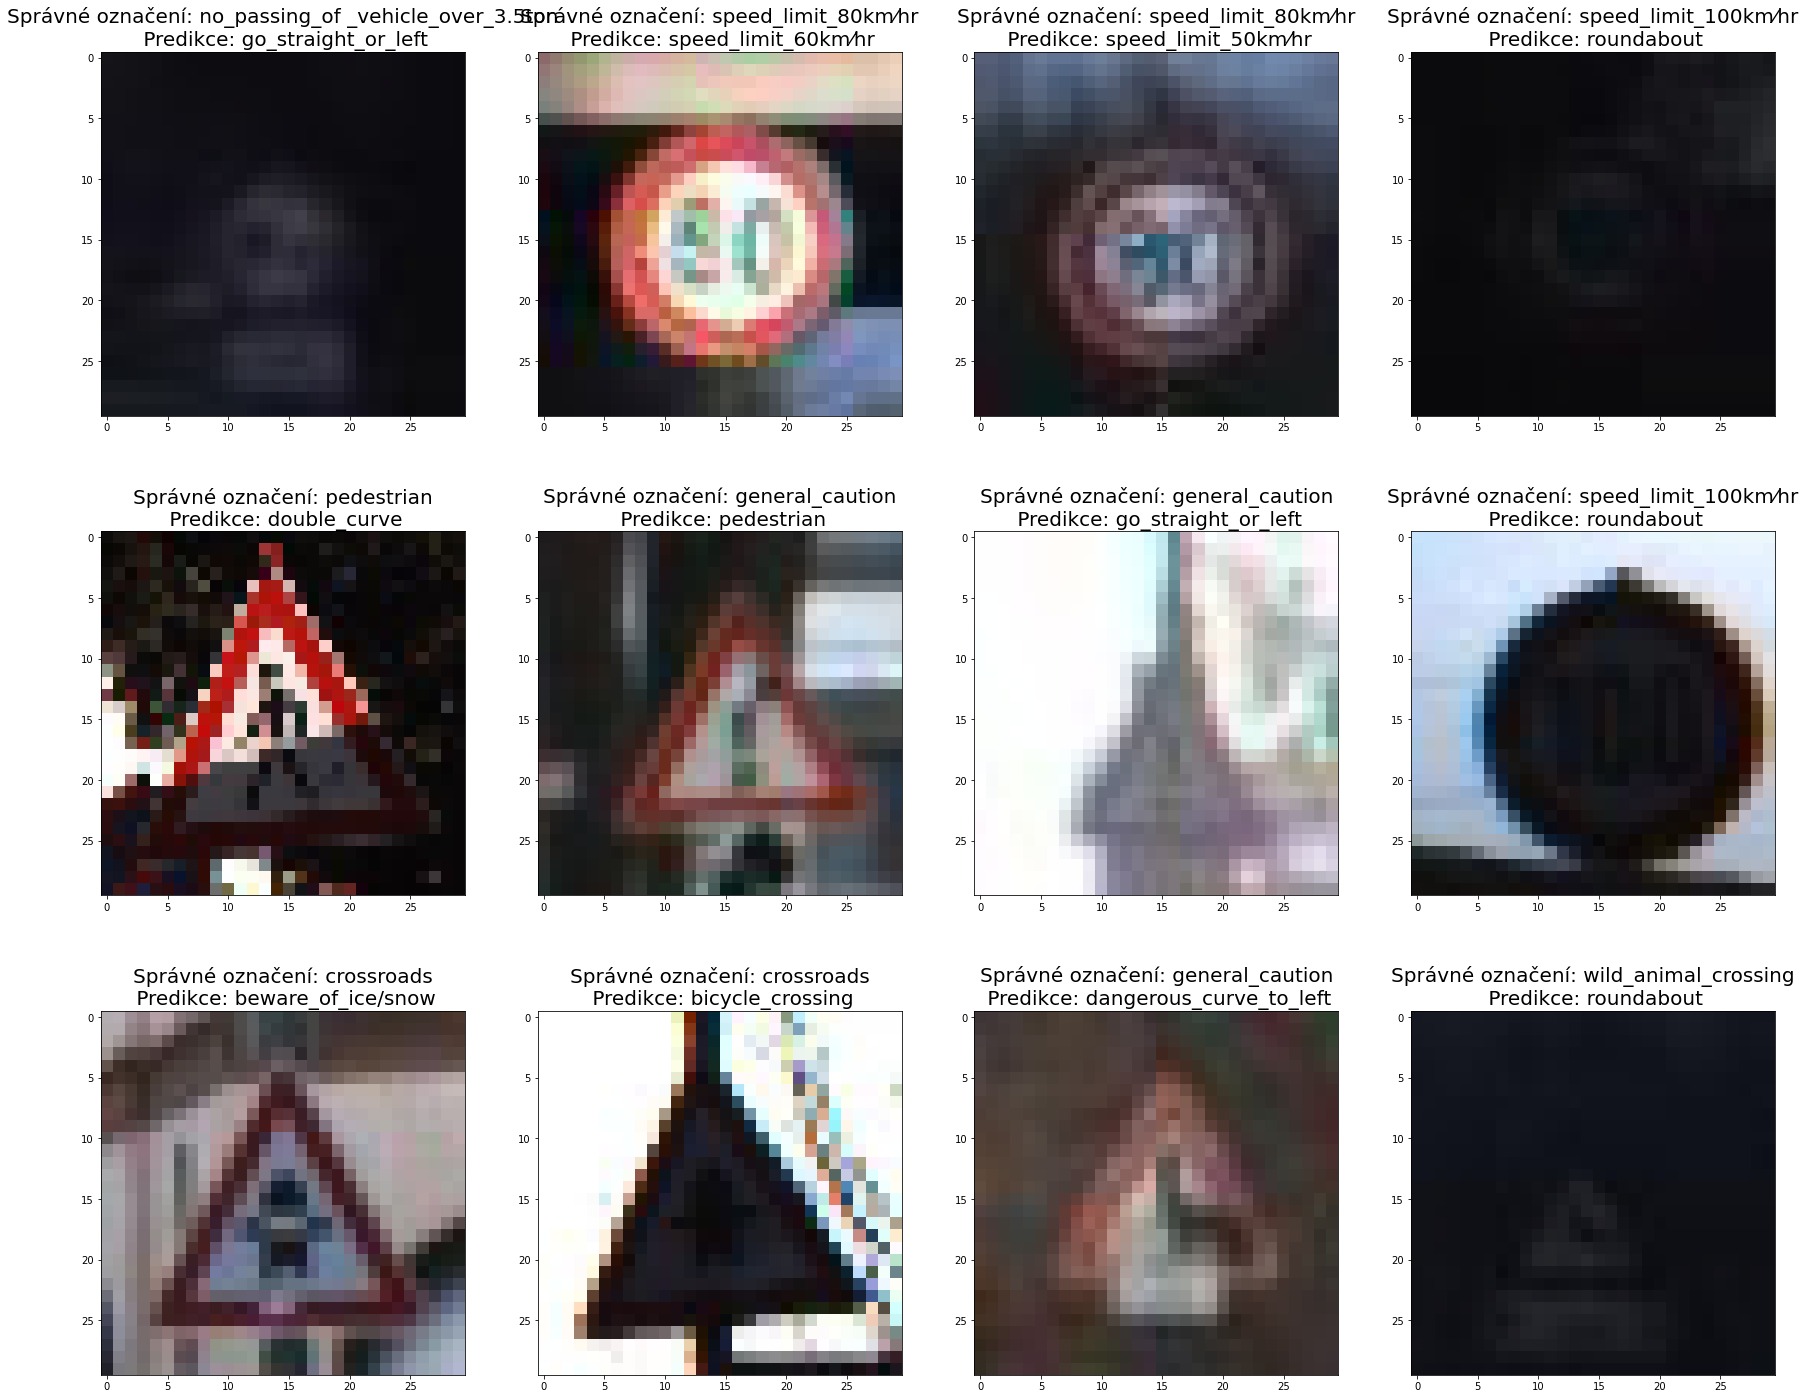

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] == predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i])
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)

## Ilustrační predikce neuronové sítě vytvořené pomocí TensorFlow Keras

In [ ]:
predictions = keras_model.predict(X_test).argmax(axis=1)
predictions


137/137 [==============================] - 0s 2ms/step


array([13,  5, 30, ..., 11,  2, 34])

### Správné predikce

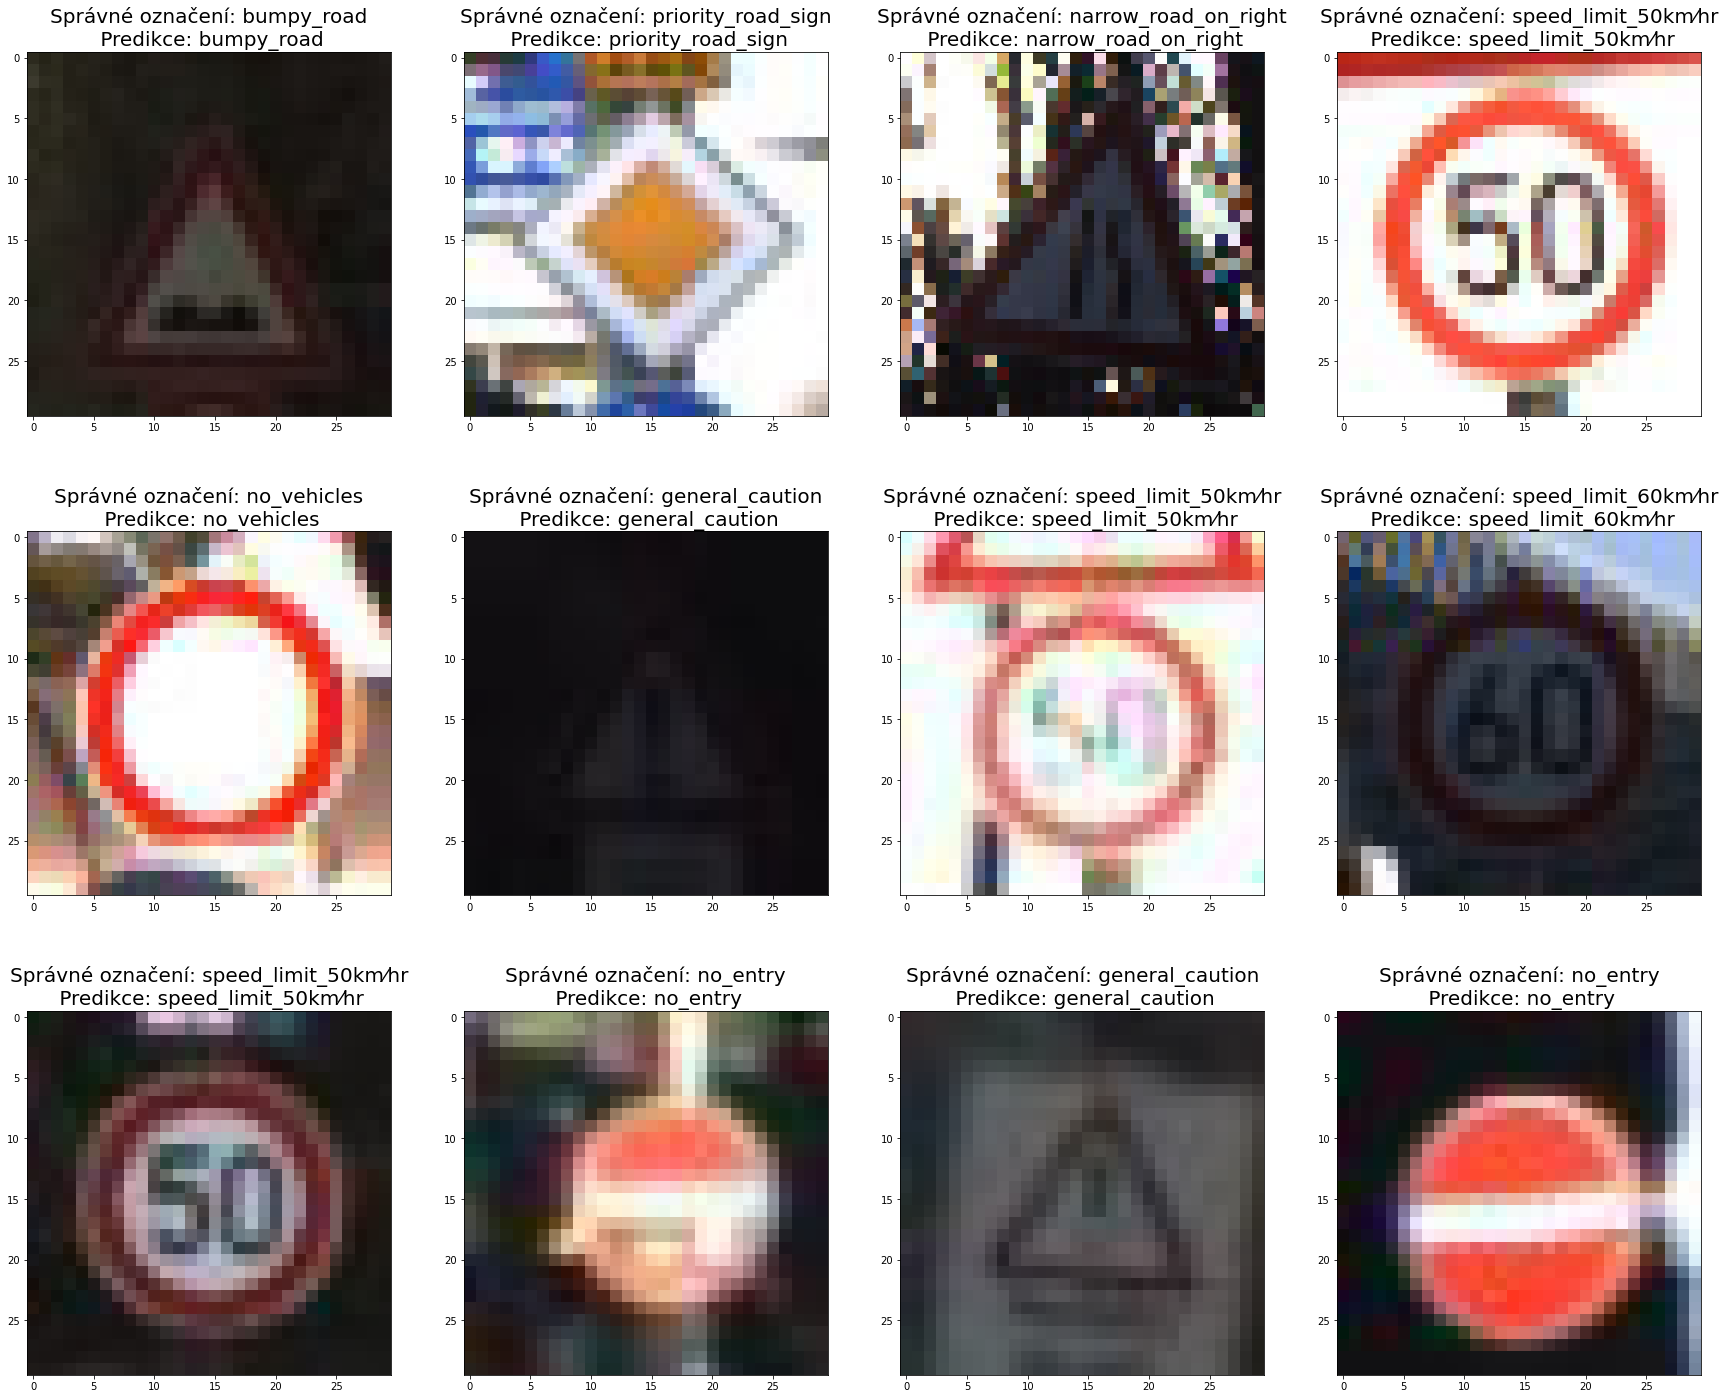

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] != predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i])
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)

### Špatné predikce

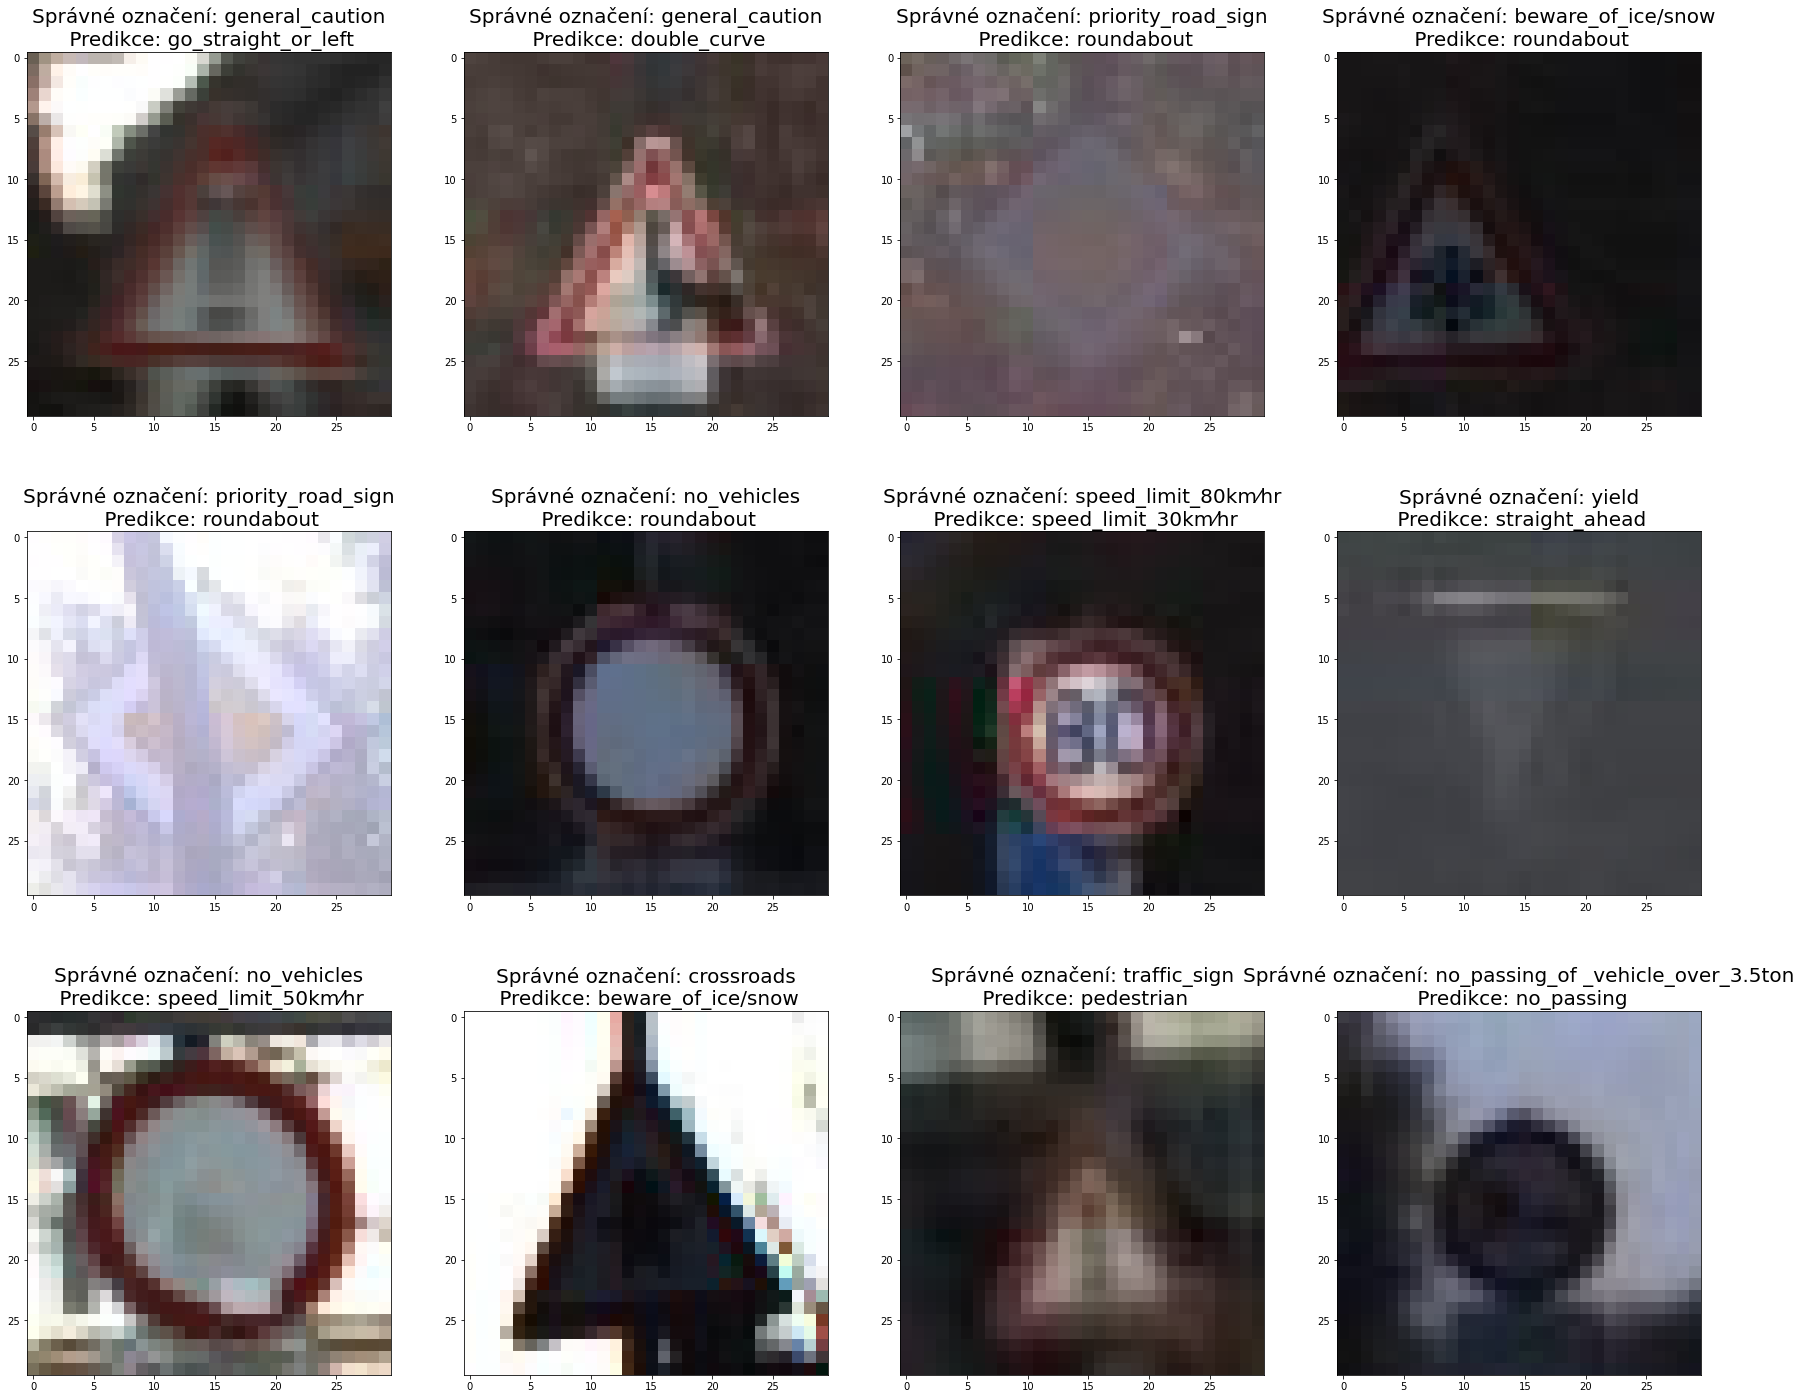

In [ ]:
fig, axes = plt.subplots(3, 4, figsize = (30, 25))
for row in axes:
  for axe in row:
    i = np.random.randint(len(predictions))
    while y_test[i] == predictions[i]:
      i = np.random.randint(len(predictions))
    axe.imshow(X_test[i])
    axe.set_title(f"Správné označení: {class_names[y_test[i]]}\n Predikce: {class_names[predictions[i]]}", fontsize=20)

# Exportování konečného modelu pro klasifikaci dopravních značek

In [ ]:
keras_model.save('/content/gdrive/My Drive/DMP_Neuronove_site/keras_gtsrb_model.h5') # Pro Colab
# keras_model.save('keras_gtsrb_model.h5') # Pro jiné rozhraní